 **Import** **Directories**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/advertising.csv')

In [ ]:
df.head(6)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2


In [ ]:
df.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.shape

(200, 4)

In [ ]:
df.size

800

In [ ]:
pd.DataFrame(df.isnull().sum(),columns =["Count of Null Values"]).T

,TV,Radio,Newspaper,Sales
Count of Null Values,0,0,0,0


**Plotting of data**

In [ ]:
a = df["Newspaper"]

In [ ]:
b = df["Sales"]

<Axes: xlabel='Newspaper', ylabel='Sales'>

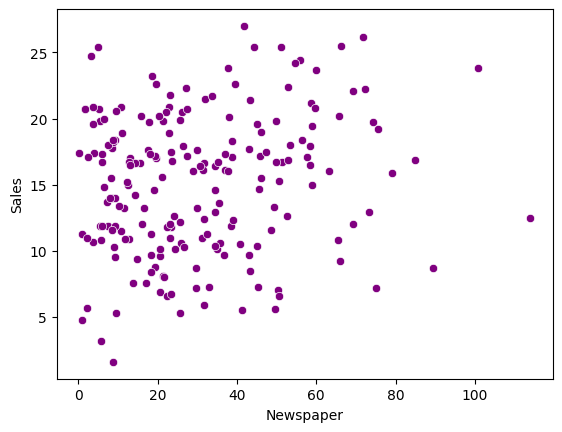

In [ ]:
sns.scatterplot(x=a,y=b,color='purple')

In [ ]:
a = df["TV"]

In [ ]:
b = df["Radio"]

<Axes: xlabel='TV', ylabel='Radio'>

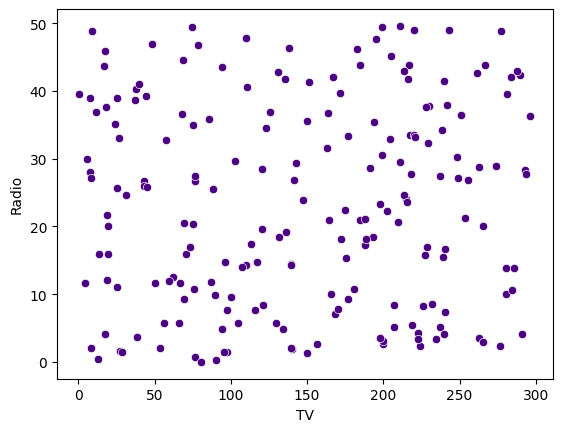

In [ ]:
sns.scatterplot(x=a,y=b,color='indigo')

In [ ]:
a = df["Radio"]

In [ ]:
b = df["Newspaper"]

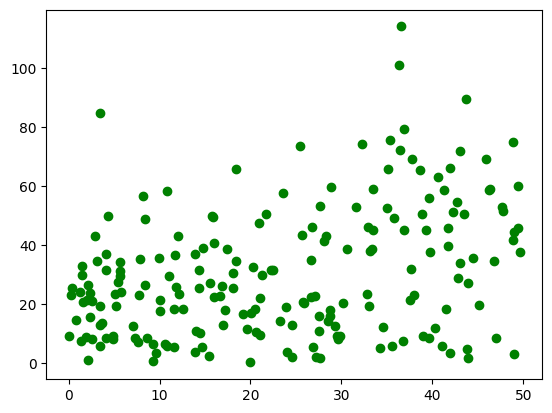

In [ ]:
plt.scatter(x=a,y=b,color='green')

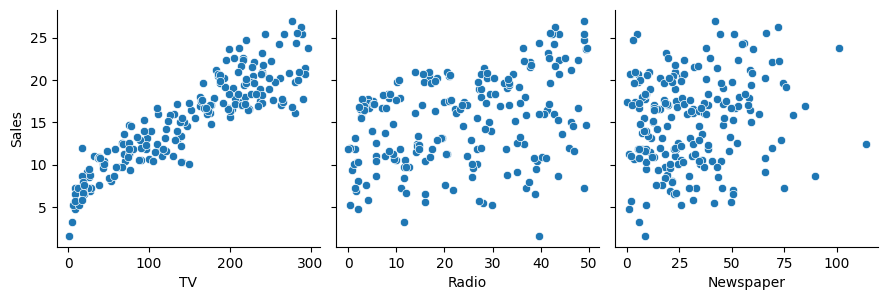

In [ ]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],height=3,aspect=1)
plt.show()

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
df.var()

TV           7370.949893
Radio         220.427743
Newspaper     474.308326
Sales          27.919517
dtype: float64

In [ ]:
df.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
dtype: float64

In [ ]:
df.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         16.00
dtype: float64

**Using Simple Linear Regression Model**

In [ ]:
X = df[['TV']]
Y = df['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=50)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lr.intercept_

6.889929307794299

In [ ]:
lr.coef_

array([0.05671244])

In [ ]:
print("The LR model is: Y = ",lr.intercept_, "+", lr.coef_, "radio ")

The LR model is: Y =  6.889929307794299 + [0.05671244] radio 


In [ ]:
lr.score(X_train,Y_train)

0.822322146620674

In [ ]:
Y_pred =lr.predict(X_test)

In [ ]:
diff = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
diff.head(5)

,Actual,Predicted
112,17.1,16.854305
165,16.9,20.188996
12,9.2,8.239685
73,11.0,14.228519
144,12.3,12.345666


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
R2 = r2_score(Y_test,Y_pred)
mae = metrics.mean_absolute_error(Y_test,Y_pred)
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

**Model accuracy Score**

In [ ]:
print('Accuracy = ',R2.round(2)*100,'%')
print('mae =',mae.round(2)*100,'%')
print('mse =',mse.round(2)*100,'%')
print('rmse =',rmse.round(2)*100,'%')

Accuracy =  73.0 %
mae = 174.0 %
mse = 466.0 %
rmse = 216.0 %
